<a href="https://colab.research.google.com/github/FeliksMakarios/ml-model_project/blob/main/UL_Deteksi_Dini_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deteksi Dini Diabetes**

Dataset diambil dari _[UCI (University of California Irvine) machine learning repository](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.)_. Pada proyek ini, kita akan melatih model machine learning untuk memprediksi apakah seseorang memiliki risiko diabetes.

In [ ]:
# menghubungkan dataframe ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library os untuk bisa berinteraksi dengan file system yang ada pada operating system (os)
import os

os.chdir("/content/drive/My Drive/Dataset/Early stage diabetes risk prediction")

In [ ]:
import pandas as pd

## **Pengumpulan dan Pembersihan Data**

### 1. Impor dataset

In [ ]:
# ubah csv dataset ke dalam bentuk dataframe
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### 2. Mengubah nilai string menjadi bentuk kategori numerik (1 dan 0)

In [ ]:
# mengubah nilai/values pada dataframe dengan .replace
# mengubahnya ke dalam bentuk kategori numerik

# Yes/No menjadi 1/0
df = df.replace("No",0)
df = df.replace("Yes",1)

# Positive/Negative menjadi 1/0
df = df.replace("Negative",0)
df = df.replace("Positive",1)

# Male/Female menjadi 1/0
df = df.replace("Female",0)
df = df.replace("Male",1)

df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
# memeriksa missing values/ nilai yang hilang

df.isnull().sum

<bound method DataFrame.sum of        Age  Gender  Polyuria  ...  Alopecia  Obesity  class
0    False   False     False  ...     False    False  False
1    False   False     False  ...     False    False  False
2    False   False     False  ...     False    False  False
3    False   False     False  ...     False    False  False
4    False   False     False  ...     False    False  False
..     ...     ...       ...  ...       ...      ...    ...
515  False   False     False  ...     False    False  False
516  False   False     False  ...     False    False  False
517  False   False     False  ...     False    False  False
518  False   False     False  ...     False    False  False
519  False   False     False  ...     False    False  False

[520 rows x 17 columns]>

In [ ]:
# memeriksa tipe data dari setiap kolom
df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

### 3. Mengubah nama kolom

In [ ]:
# mengubah nama kolom Gender menjadi 'ismale'

replace = {'Gender':'ismale'}

df = df.rename(columns=replace)
df

,Age,ismale,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
# mengubah semua nama kolom menjadi lowercase

df.columns = df.columns.str.lower()
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### 4. Ekspor DataFrame yang sudah dibersihkan ke dalam CSV

In [ ]:
# ekspor dataframe menjadi CSV
df.to_csv("diabetes_data_clean.csv", index=None)

In [ ]:
# import CSV dataset yang baru diekspor tadi menjadi dataframe
pd.read_csv("diabetes_data_clean.csv")

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


## **Visualisasi dan Statistik Data**

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import stats libraries
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot # menilai normalitas
from statsmodels.stats.weightstats import ztest # melakukan uji coba statistik perbedaan antara dua sampel

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df2 = pd.read_csv("diabetes_data_clean.csv")
df2

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Univariate Analysis

Karena kolom `age` berisi data _continuous integer_ (data angka berkelanjutan), kita dapat menyelidikinya lebih lanjut menggunakan histogram. Hal ini dilakukan untuk melihat apakah data usia terdistrubsi dengan normal dan juga melihat rentang usia yang ada.

(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <a list of 10 Patch objects>)

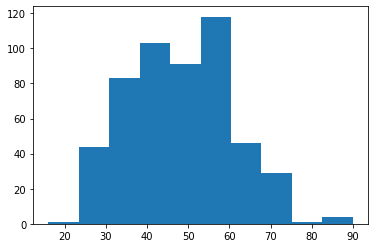

In [ ]:
plt.hist(df2['age'])

In [ ]:
# rata-rata (mean) dari usia

df2['age'].mean()

48.02884615384615

In [ ]:
# median dari usia

df2['age'].median()

47.5

In [ ]:
# menampilkan daftar nama kolom dari indeks 1 sampai akhir
columns = df2.columns[1:]
columns

Index(['ismale', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness',
       'polyphagia', 'genital thrush', 'visual blurring', 'itching',
       'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


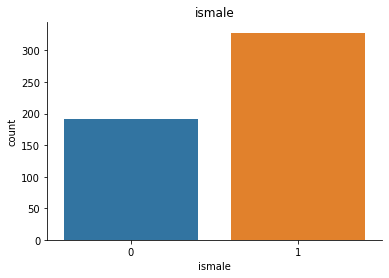

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


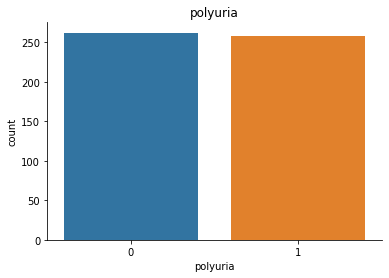

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


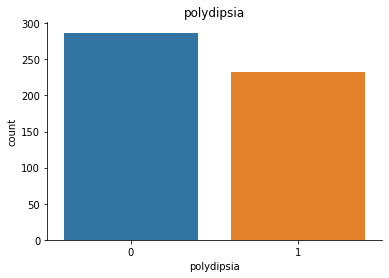

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


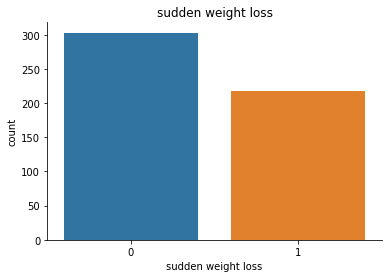

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


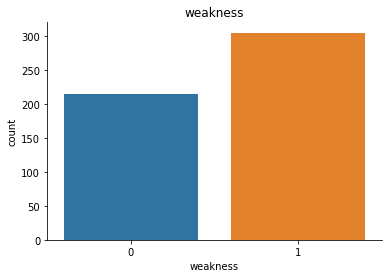

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


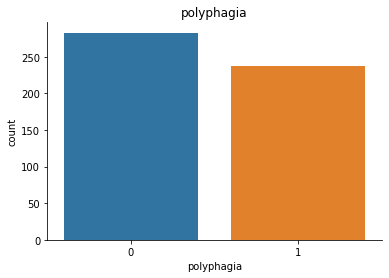

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


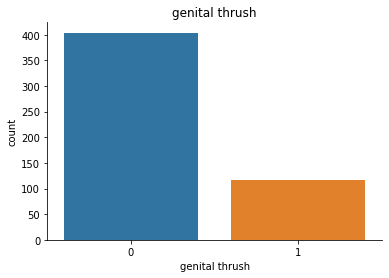

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


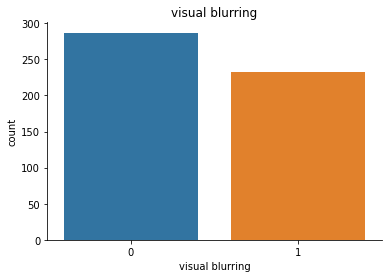

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


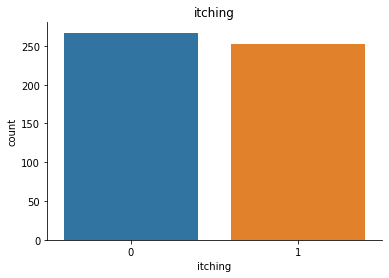

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


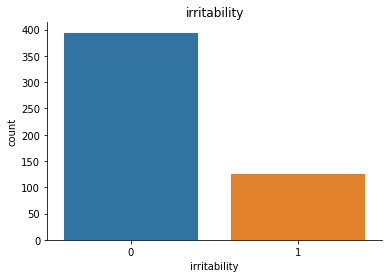

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


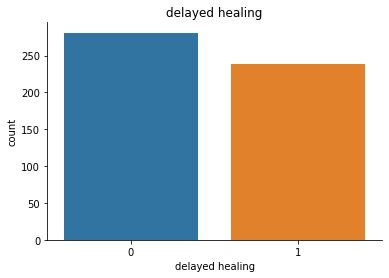

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


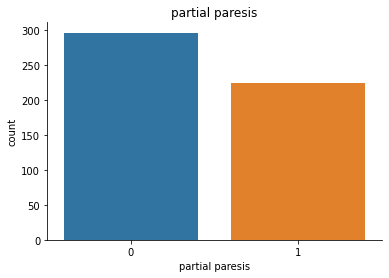

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


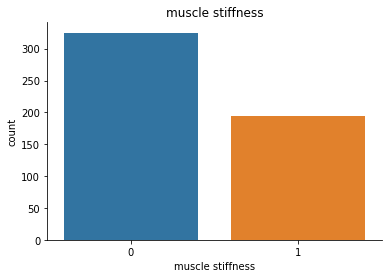

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


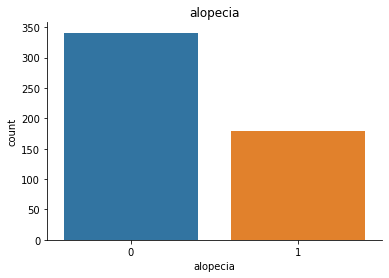

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


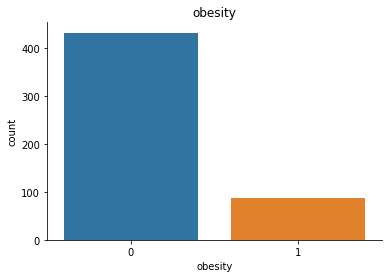

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


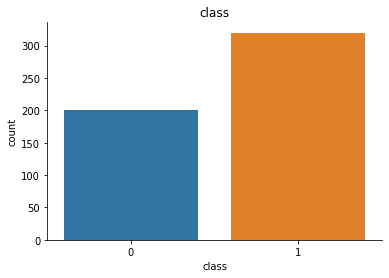

In [ ]:
# buat plot countplot secara iteratif pada kolom 1 sampai terakhir

for column in columns:
  sns.countplot(df2[column])
  plt.title(column)
  sns.despine()
  plt.show()

### Multivariate Analysis

**Hipotesis:**
1. obesitas dengan status diabetes?
2. gender dengan status diabates?
3. usia dengan status diabetes?

Jika ingin melakukan analisis pada dua variabel kategorikal secara bersamaan, maka dapat menggunakan teknik _crosstab_. [Crosstab](http://repository.unika.ac.id/19222/4/12.30.0265%20ADITYA%20SETIAWAN%20%289.83%29..pdf%20BAB%20III.pdf) adalah suatu metode analisis berbentuk tabel yang menampilkan tabulasi silang dari data yang diamati. Tabulasi silang atau table kontingensi ini digunakan untuk mengidentifikasi dan mengetahui apakah ada korelasi atau hubungan antara satu variable dengan variabel yang lain.

#### Obesitas vs Diabetes
- $H_{0}$ : Obesitas tidak berhubungan dengan diabetes (independen)
- $H_{1}$ : Obesitas berhubungan dengan diabetes (dependen)

In [ ]:
# melakukan crosstab pada kolom obesity (status obesitas) dan class (status diabetes)
obesity_diabetes_crosstab = pd.crosstab(df2['class'], df2['obesity'])
obesity_diabetes_crosstab

obesity,0,1
class,,
0,173,27
1,259,61


[Chi Square](https://pelatihan-ui.com/uji-chi-square-dengan-spss/) merupakan metode pengujian untuk melihat hubungan antara dua buah variabel kualitatif (kategorikal). Umumnya keterkaitan antar dua variabel kualitatif secara deskriptif ditampilkan dalam bentuk tabel kontingensi (CrossTab)

In [ ]:
# melakukan chi contigency square pada hasil crosstab obesitas dan diabetes

chi2_contingency(obesity_diabetes_crosstab)

(2.3274739583333344,
 0.12710799319896815,
 1,
 array([[166.15384615,  33.84615385],
        [265.84615385,  54.15384615]]))

Hasil diatas menunjukkan tuple dengan empat angka yang berbeda :
1. statistik uji $χ^2_{hitung}$: 2.3274739583333344
2. nilai probabilitas/signifikan (p-value): 0.12710799319896815
3. derajat kebebasan (degree of freedom($df$)) : 1
4. nilai harapan (expected value) jika semuanya independen

> Tolak $H_{0}$ jika $χ^2_{hitung}≥χ^2_{tabel}$

Penentuan nilai $χ^2_{tabel}$ didasarkan pada besar nilai α dan derajat bebasnya. Nilai alpha biasanya 0,05. Nilai alpha adalah kesalahan maksimal yang ditentukan. 

> Dari tabel $χ^2_{(df;α)}$ → $χ^2_{(1;0.05)}$ diperoleh = 0,05

Lalu,

> $χ^2_{hitung}≥χ^2_{tabel} = 2,32 ≥ 0,05$

Maka,
> H0 ditolak dan H1 diterima

Kita tidak bisa mengasumsikan bahwa tidak ada hubungan antara obesitas atau tidaknya seseorang dengan diabetes atau tidaknya seseorang.

Hasil ini juga dapat memberikan gambaran kepada kita bahwa variabel `obesity` tidak dapat digunakan dalam analisis regresi. Dengan kata lain, hanya variabel dengan koefisien regresi yang bermakna secara statistik yang dipakai dalam regresi. Namun, kita perlu hati-hati dengan hal ini [karena](https://statistikceria.blogspot.com/2016/12/p-value-dan-beberapa-hal-yang-terkait.html) :
1. Ketidakbermaknaan secara statistik suatu koefisien refgresi dari suatu variabel bisa saja terjadi karena ukuran sampel yang digunakan dalam penelitian adalah kecil. Mungkin saja dengan ukuran sampel yang lebih besar, koefisien regresi dari variabel tersebut akan menjadi signifikan secara statistik.
2. Tidak signifikannya secara statistik sebuah variabel bebas bisa juga terjadi karena adanya fenomena yang disebut dengan istilah _multikolinieritas_ yaitu adanya korelasi antara variabel tersebut dengan variabel independen lainnya. Dengan adanya multikolnieritas tersebut, maka sebagian ‘efek’ dari variabel bebas terhadap Y sudah terjelaskan/terambil oleh variabel lain yang berkorelasi dengan variabel tersebut, sehingga efek variabel tersebut (yang diwakili oleh koefisien regresinya) menjadi tidak signifikan secara statistik.

#### Jenis kelamin vs Diabetes
- $H_{0}$ : Jenis kelamin tidak berhubungan dengan diabetes
- $H_{1}$ : Jenis kelamin berhubungan dengan diabetes

In [ ]:
ismale_diabetes_crosstab = pd.crosstab(df2['class'], df2['ismale'])
ismale_diabetes_crosstab

ismale,0,1
class,,
0,19,181
1,173,147


In [ ]:
chi2_contingency(ismale_diabetes_crosstab)

(103.03685927972558,
 3.289703730553317e-24,
 1,
 array([[ 73.84615385, 126.15384615],
        [118.15384615, 201.84615385]]))

### Uji Statistik Perbedaan

- $H_{0}$ : Tidak ada perbedaan usia penderita diabetes dengan yg tidak diabetes
- $H_{1}$ : Ada perbedaan antara usia penderita diabetes dengan yg tidak diabetes

Kolom `age` berisi nilai integer yang terdiri dari bilangan bulat diskrit. Sementara kolom `class` berisi nilai kategorikal. Untuk menjelaskan relasi keduanya, kita dapat menggunakan box plot :
- kolom `class` sebagai sumbu **x**, dan
- kolom `age` sebagai sumbu **y**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


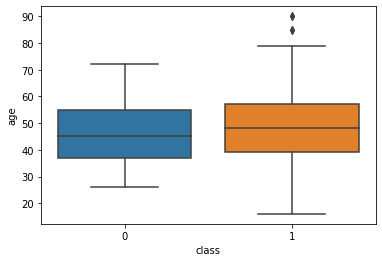

In [ ]:
sns.boxplot(df2['class'], df2['age'])

In [ ]:
# ambil dataframe yang hanya memiliki class = 0 atau tidak menderita diabetes dan simpan dalam dataframe no_diabetes
no_diabetes = df2[df2['class'] == 0]

# tampilkan media dari usia/age dari dataframe no_diabetes
no_diabetes['age'].median()

45.0

In [ ]:
# ambil dataframe yang hanya memiliki class = 1 atau menderita diabetes dan simpan dalam dataframe diabetes
diabetes = df2[df2['class'] == 1]

# tampilkan media dari usia/age dari dataframe diabetes
diabetes['age'].median()

48.0

Seperti sebelumnya, kita perlu menentukan metode uji statistik yang tepat untuk kedua data ini. Untuk membantu menentukan uji yang tepat, kita perlu memeriksa apakah datanya terdistribusi dengan normal atau tidak.

Kita dapat menggunakan `qqplot` pada kolom `age`

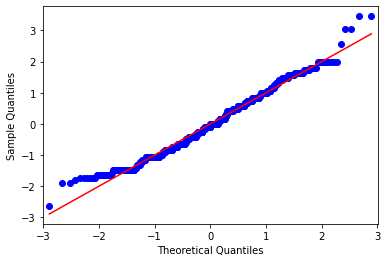

In [ ]:
qqplot(df2['age'], fit=True, line="s")
plt.show()

Sebuah data dikatakan normal jika mayoritas datanya berada pada line atau garis. Dengan begitu kita dapat melakukan uji statistik. Uji yang dilakukan adalah _Z-Test of Difference_. Z Test adalah uji statistik yang digunakan untuk menentukan apakah rata-rata dari dua populasi itu berbeda ketika varians diketahui dan ukuran sampel besar.

In [ ]:
ztest(diabetes['age'], no_diabetes['age'])

(2.4882300316303065, 0.012838066562901769)

Dari hasil Z Test dapat dilihat bahwa p-value dari no_diabetes lebih kecil dari 0.05. Artinya kita menolak $H_{0}$ dan menerima $H_{1}$

### Korelasi antar kolom

In [ ]:
korelasi = df2.corr()
korelasi

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
ismale,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


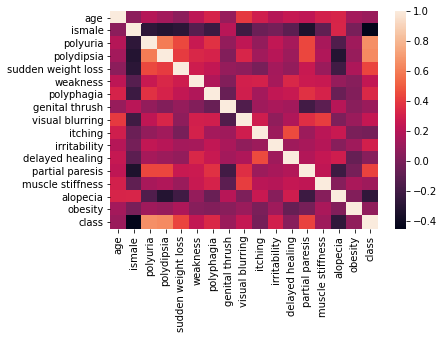

In [ ]:
sns.heatmap(korelasi)

Dari plot diatas dapat dilihat bahwa semakin terang maka menunjukkan korelasi positif yang semakin tinggi dan sebaliknya jika semakin gelap menunjukkan korelasi negatif yang semakin tinggi.

Contoh korelasi positif yang tinggi:
- `polyuria` dan `polydipsia` memiliki korelasi yang cukup tinggi terhadap `class`. Artinya penderita diabetes mayoritas mengalami polyuria dan polydipsia juga.

Contoh korelasi negatif yang tinggi:
- `polyuria`, `polydipsia`, `sudden weighted loss`, `polyphagia`, `visual blurring`, `partial paresis`, dan `class` memiliki korelasi yang cukup tinggi terhadap `ismale`. Artinya perempuan (`ismale == 0`) mayoritas mengalami polyuria, polydipsia, kehilangan berat badan mendadak, polyphagia, gangguan penglihatan, lumpuh sebagain badan, dan diabetes.

## **Melakukan Training pada Model Machine Learning** 

Pada tahap ini kita akan melatih model machine learning untuk memprediksi apakah seseorang memiliki diabetes atau tidak berdasarkan gejala yang mereka tunjukkan. Karenanya, model yang dikembangkan nantinya adalah model klasifikasi.

In [ ]:
# import libraries

from sklearn.model_selection import train_test_split #membagi data ke dalam training test
from sklearn.dummy import DummyClassifier # untuk membentuk baseline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report # untuk penilaian model

In [ ]:
# menyiapkan variabel independen dan dependen

df3 = pd.read_csv('diabetes_data_clean.csv')

X = df3.drop('class', axis=1) #independen
y = df3['class'] # dependen

In [ ]:
# periksa hasil y
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

Pembagian data training dengan test adalah 80:20.
- 80% data independen dan dependen akan digunakan sebagai `X_train` dan `y_train`
- 20% sisanya akan digunakan sebagai `X_test` dan `y_test`

In [ ]:
# split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y)

### Model dengan `DummyClassifier`

In [ ]:
# mulai training pada model
# pertama, gunakan DummyClassifier sebagai baseline untuk menebak secara acak

dummy = DummyClassifier()
dummy.fit(X_train, y_train) # melatih model dengan data X_train dan y_train
dummy_pred = dummy.predict(X_test) # menguji coba model menggunakan data X_test

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
# lakukan penilaian pada model dummy sebelumnya menggunakan confusion matrix

confusion_matrix(y_test, dummy_pred) #lakukan confusion matrix pada hasil prediksi dummy_pred dengan kondisi sebenarnya yang ada pada data y_test

array([[15, 25],
       [25, 39]])

![alt](https://1.bp.blogspot.com/-ieWkJFWBEPU/X6VGwubpKFI/AAAAAAAACR4/DUPNT4UL5AEPo3E2iEtoR9geg0oEeZwmwCLcBGAsYHQ/w1200-h630-p-k-no-nu/Confusion%2BMatrix%2BTabel.jpg)

Array hasil confusion matrix diatas adalah sebagai berikut :
- _**True Positive (TP)**_: Data Positif yang diprediksi Benar oleh model.
Kondisi sebenarnya pasien memang Menderita Diabetes dan hasil prediksi model juga menunjukkan demikian.
- _**True Negative (TN)**_: Data Negatif yang diprediksi Benar oleh model.
Kondisi sebenarnya pasien memang Tidak Menderita Diabetes dan hasil prediksi model juga menunjukkan demikian.
- _False Positive (FP)_: Data Positif yang diprediksi Salah/keliru oleh model.
Kondisi sebenarnya pasien Tidak Menderita Diabetes. Namun model memprediksi Menderita Diabetes.
- _False Negative (FN)_: Data Negatif yang diprediksi Salah/keliru oleh model. Kondisi sebenarnya pasien Menderita Diabetes. Namun model memprediksi Tidak Menderita Diabetes

Model diharapkan mampu memiliki nilai FP dan FN seminimal mungkin agar lebih akurat. Teknik ini menjadi dasar untuk mengukur kinerja model _(performance metrics)_ yang dibuat pada machine learning. Salah satu performance metrics tersebut adalah **accuracy/akurasi**.

Akurasi menunjukkan sejauh mana keakuratan model untuk dapat mengklasifikasikan dengan benar. Dengan kata lain, akurasi akan menunjukkan tingkat kedekatan nilai prediksi model dengan nilai sebenarnya. Hal ini dapat dilihat dari rasio prediksi **TP** dan **TN** dengan keseluruhan data. Kita dapat menggunakan `classification_report` untuk melihat akurasinya.

In [ ]:
# lakukan penilaian juga dengan classification_report

print (classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        40
           1       0.61      0.61      0.61        64

    accuracy                           0.52       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.52      0.52      0.52       104



_Precision (Presisi)_ merupakan rasio prediksi **TP** dibandingkan dengan keseluruhan hasil yang diprediksi Positif. Precission menjawab pertanyaan “Berapa persen pasien yang benar Diabetes dari keseluruhan pasien yang diprediksi Diabetes?”

$$Precission = \frac{(TP)} {(TP+FP)}$$

_Recall (Sensitifitas)_ merupakan rasio prediksi **TP** dibandingkan dengan keseluruhan data yang benar Positif. Recall menjawab pertanyaan “Berapa persen pasien yang diprediksi Diabetes dibandingkan keseluruhan pasien yang sebenarnya Diabetes?”

$$Recall = \frac{(TP)} {(TP + FN)}$$

_F1-Score_ merupakan perbandingan rata-rata presisi dan recall yang dibobotkan.

$$F1 Score = 2 * \frac{(Recall*Precission)} {(Recall + Precission)}$$

Akurasi menggunakan `DummyClassifier` sebesar 52%. Lumayan. Kita coba menggunakan model lainnya

### Model dengan Regresi Logistik

In [ ]:
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)

In [ ]:
confusion_matrix(y_test, logr_pred)

array([[37,  3],
       [ 8, 56]])

In [ ]:
print (classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.95      0.88      0.91        64

    accuracy                           0.89       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.90      0.89      0.90       104



Akurasi prediksi dengan model Regresi Logistik sebesar 92%. Wow.

### Model dengan Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [ ]:
confusion_matrix(y_test, tree_pred)

array([[40,  0],
       [ 4, 60]])

In [ ]:
print (classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.94      0.97        64

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



Menggunakan model Decision Tree memperoleh hasil akurasi 94%. Better than before.

### Model dengan Random Forest

In [ ]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
ranfor_pred = ranfor.predict(X_test)

In [ ]:
confusion_matrix(y_test, ranfor_pred)

array([[39,  1],
       [ 1, 63]])

In [ ]:
print (classification_report(y_test, ranfor_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Menggunakan model Decision Tree memperoleh hasil akurasi 98%. Nearly perfect !!!

Bagaimana model Random Forest bisa memiliki akurasi yang tinggi? Kita bisa mengidentifikasi fitur apa saja yang dianggap paling penting oleh model ini.

In [ ]:
ranfor.feature_importances_

array([0.09335028, 0.09613505, 0.21546956, 0.21423346, 0.06647112,
       0.01740128, 0.02733643, 0.02382311, 0.02384777, 0.03679754,
       0.0419113 , 0.02943291, 0.04152207, 0.01903603, 0.03652294,
       0.01670915])

In [ ]:
# tampilkan kolom yang ada pada data X
X.columns

Index(['age', 'ismale', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity'],
      dtype='object')

In [ ]:
# buat tabel yang akan menampilkan kolom fitur dan kolom tingkat kepentingan fitur tersebut. lalu urutkan dari yang paling penting
pd.DataFrame({'fitur': X.columns, 'importances': ranfor.feature_importances_}).sort_values('importances', ascending=False)

,fitur,importances
2,polyuria,0.215470
3,polydipsia,0.214233
1,ismale,0.096135
0,age,0.093350
4,sudden weight loss,0.066471
10,irritability,0.041911
12,partial paresis,0.041522
9,itching,0.036798
14,alopecia,0.036523
11,delayed healing,0.029433


Dari sini dapat terlihat bahwa 5 fitur paling penting adalah `polyuria`, `polydipsia`, `ismale`, `age`, `sudden weight loss`. Hal ini sesuai dengan analisis statistik yang kita lakukan sebelumnya. Itulah sebabnya perlu melakukan analisis statistik sebelum menentukan model agar kita punya gambaran awal.

Dengan hasil ini, seorang dokter sudah dapat bertindak dengan cepat ketika mengetahui bahwa setidaknya pasien yang memiliki riwayat polyuria dan polydipsia kemungkinan besar mengidap diabetes.

## **Referensi Lainnya**

- [_Chi-Square Test of Independence_](https://www.jmp.com/en_ca/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html)
- [Contoh Soal Uji Chi Square: Syarat dan Tabel Acuannya](https://www.statmat.net/uji-chi-square/)
- [Z-Test](https://www.investopedia.com/terms/z/z-test.asp)
- [Mengenal Accuracy, Precision, Recall dan Specificity serta yang diprioritaskan dalam Machine Learning](https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8)